In [1]:
import pandas as pd
import sklearn
import numpy as np
import math
import os

os.getcwd()

'C:\\Users\\Indyscout\\Documents\\Masters_Program\\SECURITY2.0\\CYBRProejct'

In [2]:
dataRaw = pd.read_csv('https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv')
dataRaw.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [3]:
dataRaw.shape

(88647, 112)

In [4]:
dataRaw.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
Features = dataRaw.iloc[:,:-1] # target is in last column
X = Features
y = dataRaw['phishing']
X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,1,2,0,292,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,306,1,2,1,3597,0,1,0,0,0


In [6]:
# I'll start by plotting correlations for features
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(50,50))
#sns.heatmap(X.corr())
#plt.show() #it looks like a window lmao; instant regret

#### Preliminary Random Forest Model

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [8]:
# making model
model_1 = RandomForestClassifier(n_jobs = -1, verbose = True, n_estimators = 200 , random_state = 426, max_depth = 15)
model_1.fit(train_X,train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=True, warm_start=False)

In [9]:
# Saving some validation predicitons and probabilites
val_preds = model_1.predict(val_X)
# predict probabilities
probs = model_1.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_1 = probs[:, 1]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [10]:
# Scoring model: Accuracy, F1 Score, Average Precision
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score


print("Mean Accuracy on Test Data:",model_1.score(val_X,val_y))
print("F1 Score:",f1_score(val_y,val_preds))
print("Average Precision:", average_precision_score(val_y, probs_1)) # second input must be y probability estimates of the positive class

Mean Accuracy on Test Data: 0.964759498240231
F1 Score: 0.9493219129193433
Average Precision: 0.9888433343683303


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [11]:
# Going to plot the ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# AUC
auc = roc_auc_score(val_y, probs_1)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_1)

RandomForest: ROC AUC=0.994


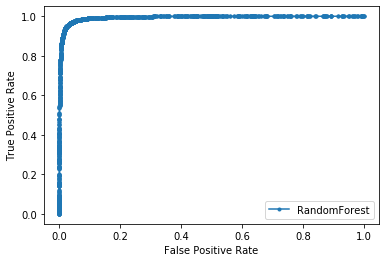

In [12]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Model 1: AUC=0.989')

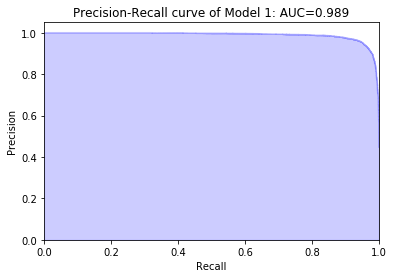

In [13]:
# Precision recall curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_1)
test_average_precision = average_precision_score(val_y, probs_1)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Model 1", str_average_precision))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


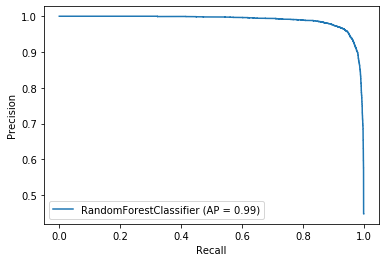

In [14]:
plot_precision_recall_curve(model_1,val_X,val_y)

#### ToDo List:
- check for over and under fitting
- get new data from phishtank, copy the scraping algorithm, and feed the new phishing sites into the current models to see how it works out
- maybe look into cross validation
- is there target leak? Does the model have access to something that is too telling?
- which features are contributing the most to the model?
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- Going to try and make models for each of the different feature tables specified in the original journal
- Need to add confusion matrix to each of the models

#### Table 1 RF Model

In [15]:
# Making RF for table 1, first I need to subset the table 1 features; Table 1 is the URL table, no external services
Features_table1 = ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url',
                         'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url',
                         'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url',
                         'length_url', 'email_in_url']
# X and y
X = dataRaw[Features_table1]
y= dataRaw['phishing']

In [16]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [17]:
# making model
model_2 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_2.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [18]:
# Saving some validation predicitons and probabilites
val_preds_table1 = model_2.predict(val_X)
# predict probabilities
probs_table1 = model_2.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table1 = probs_table1[:, 1]

In [19]:
print("Mean Accuracy on Table 1 Test Data:",model_2.score(val_X,val_y))
print("Table 1 F1 Score:",f1_score(val_y,val_preds_table1))
print("Table 1 Average Precision:", average_precision_score(val_y, probs_table1)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 1 Test Data: 0.907318834040249
Table 1 F1 Score: 0.871625
Table 1 Average Precision: 0.9438487794253738


#### Table 2 RF Model

In [20]:
# Making RF for table 2, first I need to subset the table 2 features; Table 2 is features specific to the 'domain' section of the URL
Features_table2 = ['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 
                   'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 
                   'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 
                   'domain_length', 'domain_in_ip', 'server_client_domain']
# X and y
X = dataRaw[Features_table2]
y= dataRaw['phishing']

In [21]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [22]:
# making model
model_3 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_3.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [23]:
# Saving some validation predicitons and probabilites
val_preds_table2 = model_3.predict(val_X)
# predict probabilities
probs_table2 = model_3.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table2 = probs_table2[:, 1]

In [24]:
print("Mean Accuracy on Table 2 Test Data:",model_3.score(val_X,val_y))
print("Table 2 F1 Score:",f1_score(val_y,val_preds_table1))
print("Table 2 Average Precision:", average_precision_score(val_y, probs_table2)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 2 Test Data: 0.7569713924736035
Table 2 F1 Score: 0.871625
Table 2 Average Precision: 0.68337414669185


#### Table 3 RF Model

In [25]:
# Making RF for table 3, first I need to subset the table 3 features; Table 3 is features specific to the 'directory' section of the URL
Features_table3 =['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 
                  'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 
                  'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length']

# X and y
X = dataRaw[Features_table3]
y= dataRaw['phishing']

In [26]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [27]:
# making model
model_4 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_4.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [28]:
# Saving some validation predicitons and probabilites
val_preds_table3 = model_4.predict(val_X)
# predict probabilities
probs_table3 = model_4.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table3 = probs_table3[:, 1]

In [29]:
print("Mean Accuracy on Table 3 Test Data:",model_4.score(val_X,val_y))
print("Table 3 F1 Score:",f1_score(val_y,val_preds_table3))
print("Table 3 Average Precision:", average_precision_score(val_y, probs_table3)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 3 Test Data: 0.9039797852179406
Table 3 F1 Score: 0.8612415232133541
Table 3 Average Precision: 0.9211080293986422


#### Table 4 RF Model

In [30]:
# Making RF for table 4, first I need to subset the table 4 features; Table 4 is features specific to the 'URL File Name' section of the URL
Features_table4 = ['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 
                   'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 
                   'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'qty_percent_file', 'file_length']

# X and y
X = dataRaw[Features_table4]
y= dataRaw['phishing']

In [31]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [32]:
# making model
model_5 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_5.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [33]:
# Saving some validation predicitons and probabilites
val_preds_table4 = model_5.predict(val_X)
# predict probabilities
probs_table4 = model_5.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table4 = probs_table4[:, 1]

In [34]:
print("Mean Accuracy on Table 4 Test Data:",model_5.score(val_X,val_y))
print("Table 4 F1 Score:",f1_score(val_y,val_preds_table4))
print("Table 4 Average Precision:", average_precision_score(val_y, probs_table4)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 4 Test Data: 0.8672502481725476
Table 4 F1 Score: 0.8338979223125564
Table 4 Average Precision: 0.8359945562945534


#### Table 5 RF Model

In [35]:
# Making RF for table 4, first I need to subset the table 4 features; Table 4 is features specific to the 'URL Parameters' section of the URL
Features_table5 = ['qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params', 'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params', 'qty_dollar_params', 'qty_percent_params', 'params_length', 'tld_present_params', 'qty_params']

# X and y
X = dataRaw[Features_table5]
y= dataRaw['phishing']

In [36]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [37]:
# making model
model_6 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_6.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [38]:
# Saving some validation predicitons and probabilites
val_preds_table5 = model_6.predict(val_X)
# predict probabilities
probs_table5 = model_6.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table5 = probs_table5[:, 1]

In [39]:
print("Mean Accuracy on Table 5 Test Data:",model_6.score(val_X,val_y))
print("Table 5 F1 Score:",f1_score(val_y,val_preds_table5))
print("Table 5 Average Precision:", average_precision_score(val_y, probs_table5)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 5 Test Data: 0.7243479830340221
Table 5 F1 Score: 0.3507280263577426
Table 5 Average Precision: 0.486514980057776


#### Table 6 RF Model

In [40]:
# Making RF for table 6, first I need to subset the table 6 features; Table 6 is features specific to 'resolving URL and external services' 
Features_table6 = ['time_response', 'domain_spf', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved', 
                   'qty_nameservers', 'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects', 'url_google_index', 
                   'domain_google_index', 'domain_google_index', 'url_shortened']
# X and y
X = dataRaw[Features_table6]
y= dataRaw['phishing']

In [41]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [42]:
# making model
model_7 = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_7.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [43]:
# Saving some validation predicitons and probabilites
val_preds_table6 = model_7.predict(val_X)
# predict probabilities
probs_table6 = model_7.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_table6 = probs_table6[:, 1]

In [44]:
print("Mean Accuracy on Table 6 Test Data:",model_7.score(val_X,val_y))
print("Table 6 F1 Score:",f1_score(val_y,val_preds_table1))
print("Table 6 Average Precision:", average_precision_score(val_y, probs_table3)) # second input must be y probability estimates of the positive class

Mean Accuracy on Table 6 Test Data: 0.8829528020936739
Table 6 F1 Score: 0.871625
Table 6 Average Precision: 0.9211080293986422


#### Rank of Feature Importance by Table

From Best to Worst:
- All Tables (Full Dataset)
- Table 1
- Table 3
- Table 6
- Table 4
- Table 2
- Table 5

#### Final Model: Full Dataset using RFE feature selection

In [45]:
Features = dataRaw.iloc[:,:-1] # target is in last column
X = Features
y = dataRaw['phishing']
X.shape

(88647, 111)

In [46]:
# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [47]:
# making model on full dataset to use RFE selector on

model_full = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_full.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [48]:
# Going to use recursive feature elimination from sklearn to get top 50 features
from sklearn.feature_selection import RFE

selector = RFE(model_full, n_features_to_select= 50, step=1)
selector = selector.fit(X, y)


In [49]:
# This should return a boolean which I can use to index the feature set
selector_index = selector.get_support()

In [50]:
# indexing features based on the RFE selector

final_Features = Features.iloc[:,selector_index]

# what are the features?
final_Features.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'length_url',
       'qty_dot_domain', 'qty_vowels_domain', 'domain_length',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'params_length', 'time_response',
       'asn_ip', 'time_domain_activation', 'time_domain_expiration',
       'qty_ip_resolved',

In [51]:
# Setting X and y

X = final_Features
y = dataRaw['phishing']

# Split into train and test data

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=426)

In [52]:
# Final model

model_final = RandomForestClassifier(n_jobs = -1, verbose = False, n_estimators = 200 , random_state = 426, max_depth = 15)
model_final.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=426,
                       verbose=False, warm_start=False)

In [53]:
# Saving some validation predicitons and probabilites
val_preds = model_final.predict(val_X)
# predict probabilities
probs = model_final.predict_proba(val_X)
# keep probabilities for the positive outcome only
probs_final = probs[:, 1]


In [54]:
print("Mean Accuracy on Test Data:",model_final.score(val_X,val_y))
print("F1 Score:",f1_score(val_y,val_preds))
print("Average Precision:", average_precision_score(val_y, probs_final)) # second input must be y probability estimates of the positive class

Mean Accuracy on Test Data: 0.9674668351231839
F1 Score: 0.9531787778427171
Average Precision: 0.9902867879936432


In [55]:
# Going to plot the ROC 

# AUC
auc = roc_auc_score(val_y, probs_final)
print('RandomForest: ROC AUC=%.3f' % (auc))

# calculating roc curve
fpr, tpr, thresholds = roc_curve(val_y, probs_final)

RandomForest: ROC AUC=0.995


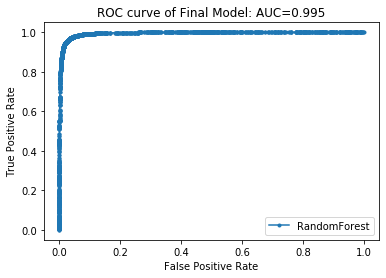

In [63]:
# plotting the curve
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# title
plt.title('ROC curve of {}: AUC={}'.format("Final Model", round(auc, 3)))
# show the legend
plt.legend()
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve of Final Model: AUC=0.989')

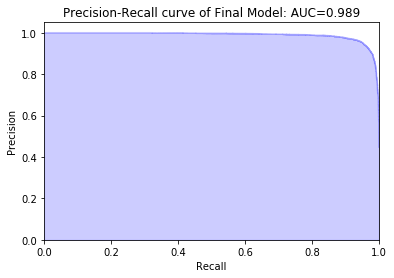

In [59]:
# Precision recall curve
# Calculating values
precision, recall, thresholds = precision_recall_curve(val_y, probs_1)
test_average_precision = average_precision_score(val_y, probs_1)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
str_average_precision = "{0:.3f}".format(test_average_precision)
plt.title('Precision-Recall curve of {}: AUC={}'.format("Final Model", str_average_precision))

In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y,val_preds)


array([[14102,   404],
       [  317,  7339]], dtype=int64)